In [1]:
import starry
import numpy as np
import time
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
l = [1, 2, 3, 5, 8, 13, 21, 34, 55]
npts = np.array(np.logspace(2, 6, 9), dtype=int)
t = np.zeros((len(npts), len(l)))
for i, lmax in enumerate(l):
    map = starry.Map(lmax)
    map[:] = np.random.randn(lmax)
    for j, n in enumerate(npts):
        ro = 0.1
        xo = np.linspace(-0.8, 0.8, n)
        tstart = time.time()
        map.flux(xo=xo, ro=ro)
        t[j, i] = time.time() - tstart

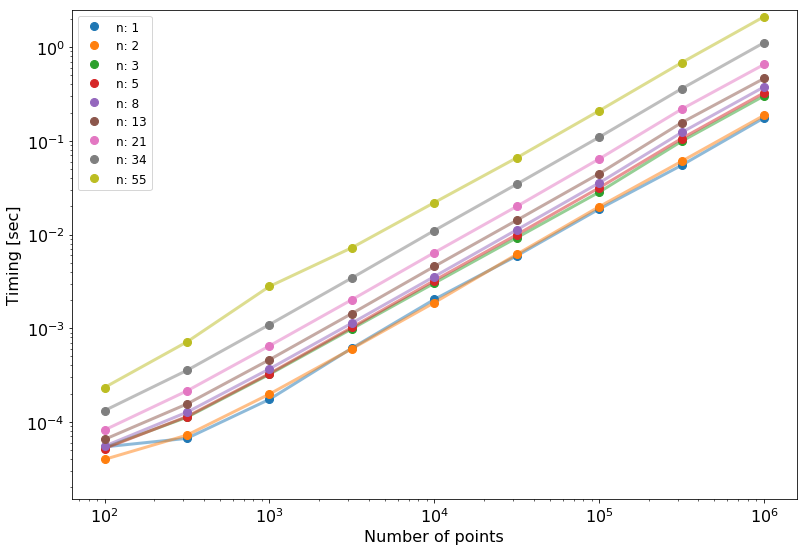

In [3]:
fig, ax = pl.subplots(1, figsize=(13, 9))
for ti, lmax, i in zip(t.transpose(), l, range(len(l))):
    ax.plot(npts, ti, 'o', color='C%d' % i, label="n: %s" % lmax, ms=8)
    ax.plot(npts, ti, '-', color='C%d' % i, alpha=0.5, lw=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_xlabel('Number of points', fontsize=16)
ax.set_ylabel('Timing [sec]', fontsize=16)
ax.set_ylim(1.5e-5, 2.5)
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

In [4]:
l = np.logspace(np.log10(1), np.log10(55), 20)
l = np.array(l, dtype=int)
l = np.array(list(sorted(set(l))))
t = np.zeros(len(l))
npts = 100000
ntimes = 100
ro = 0.1
xo = np.linspace(-0.8, 0.8, npts)
for i, lmax in enumerate(l):
    map = starry.Map(lmax)
    map[:] = np.random.randn(lmax)
    tstart = time.time()
    for j in range(ntimes):
        map.flux(xo=xo, ro=ro)
    t[i] = (time.time() - tstart) / ntimes

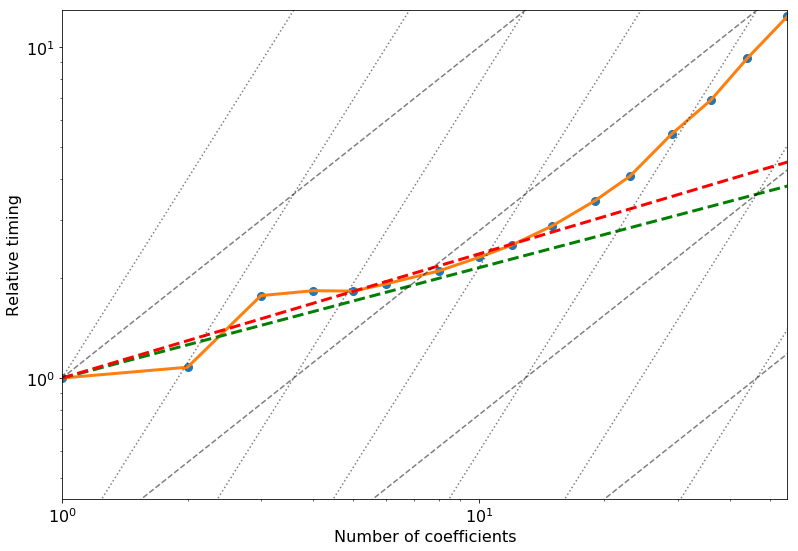

In [5]:
fig, ax = pl.subplots(1, figsize=(13, 9))
ax.plot(l, t / t[0], 'o', color='C0', ms=8)
ax.plot(l, t / t[0], '-', color='C1', lw=3)
ax.plot(l, l ** (1. / 3.), 'g--', lw=3)
ax.plot(l, l ** (3. / 8.), 'r--', lw=3)
ax.set_ylim(*ax.get_ylim())
ax.set_xlim(1, 55)
for fac in np.logspace(-5, 0, 10):
    x = np.linspace(0., 100., 100)
    ax.plot(x, fac * x, 'k--', alpha=0.5)
    ax.plot(x, fac * x ** 2, 'k:', alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Number of coefficients', fontsize=16)
ax.set_ylabel('Relative timing', fontsize=16)
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)